# Exercise 05 Classification II

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [110]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Part 1. K-Nearest Neighbors with the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

Build a binary classifier using KNN algorithm for the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

### Load dataset

Load this dataset using `sklearn.datasets.load_breast_cancer`, you can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [111]:
# load dataset
feature_df, target_df = datasets.load_breast_cancer(
    return_X_y = True,
    as_frame = True
)

### Train test split

70% as the training dataset and the rest as the testing dataset.

Only keep the first two features as the inputs for the convenience of visualization

Shuffle the entire dataset before spliting.

Guarantee the reproducibility by fixing `random_state` as 0.

In [112]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df[['mean radius', 'mean texture']].values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Train the model

We will use `sklearn.neighbors.KNeighborsClassifier` to implement a binary classifier.

However, we need to perform feature scaling at first using `sklearn.preprocessing.StandardScaler`.

We could construct a pipeline to embed these two steps.

In [113]:
# construct the pipeline
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('k-nearest neighbors', KNeighborsClassifier(
            n_neighbors = 5, # consider 5 nearest neighbors
            weights = 'uniform', # all nearest neighbors are equally important
            metric = 'minkowski', # use Euclidean distance as the distance metric
        ))
    ]
)

In [114]:
# fit the model
clf.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('k-nearest neighbors', KNeighborsClassifier())])

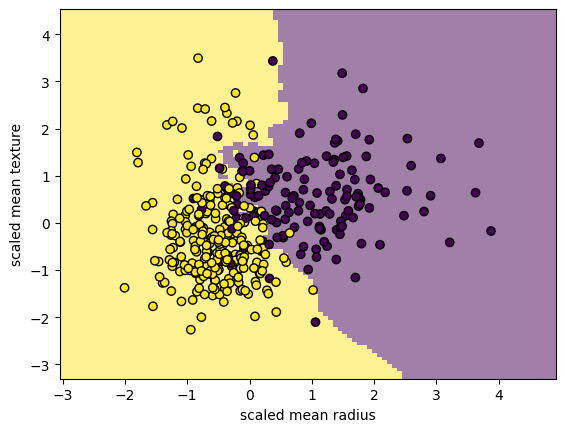

In [115]:
# display the decision boundary learned from the training dataset
# plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf['k-nearest neighbors'],
    clf['standard scaler'].transform(X_train),
    response_method = "predict",
    plot_method = "pcolormesh",
    xlabel = 'scaled mean radius',
    ylabel = 'scaled mean texture',
    shading = "auto",
    alpha = 0.5
)
# plot training data points
disp.ax_.scatter(
    clf['standard scaler'].transform(X_train)[:, 0],
    clf['standard scaler'].transform(X_train)[:, 1],
    c = y_train,
    edgecolors = 'k'
)
plt.show()

### Make predictions on testing dataset

In [116]:
# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 predictions
y_pred[:5]

array([1, 1, 1, 1, 1])

KNN classifier can also provide a simple estimation of probability.

The estimated probability is simply the fraction of votes among nearest neighbours.

For example, in the 5 nearest neighbors:
- 1 belongs to class 0
- 4 belongs to class 1

Then, the estimated probabilities are:
- The probability of class 0 is 1 / 5 = 0.2
- The probability of class 1 is 4 / 5 = 0.8

In [117]:
# predict probabilities for testing dataset
y_pred_proba = clf.predict_proba(X_test)
# show the first 5 predictions
y_pred_proba[:5,:]

array([[0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8]])

We can use the methods `KNeighborsClassifier.kneighbors()` to obtain the nearest neighbors of a data point and check if the estimated probabilities is calculated based on the simple fraction of votes.

In [118]:
# obtain nearest neighbors
distances, indices = clf['k-nearest neighbors'].kneighbors(
    clf['standard scaler'].transform(X_test[:5, :])
)
# print the classes of the nearest neighbors
for index in indices:
    print('Classes of nearest neighbors:', y_train[index])

Classes of nearest neighbors: [0 1 0 1 1]
Classes of nearest neighbors: [0 0 1 1 1]
Classes of nearest neighbors: [0 1 1 1 1]
Classes of nearest neighbors: [1 1 1 1 1]
Classes of nearest neighbors: [1 1 0 1 1]


### Evaluate the model

Compute the confusion matrix.

Generate the classification report.

Create the ROC curve and calculate the AUC metric.

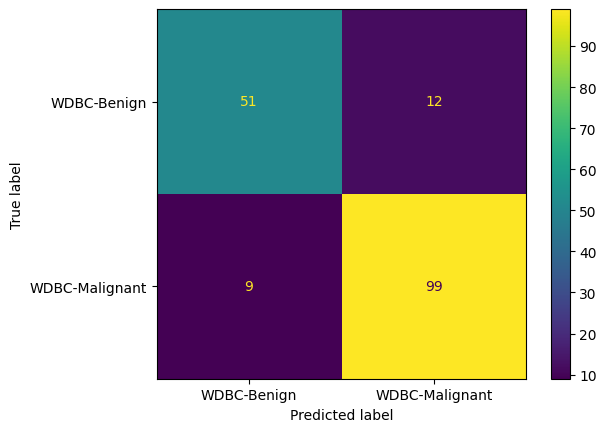

In [119]:
# compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['WDBC-Benign', 'WDBC-Malignant']
)
disp.plot()
plt.show()

In [120]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        63
           1       0.89      0.92      0.90       108

    accuracy                           0.88       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



## Part 2. Support Vector Machine with the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

Build a binary classifier using SVM algorithm for the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

### Load dataset

In [121]:
# load dataset
feature_df, target_df = datasets.load_breast_cancer(
    return_X_y = True,
    as_frame = True
)

### Train test split

In [122]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df[['mean radius', 'mean texture']].values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Train the model

We will use `sklearn.svm.SVC` to implement a binary classifier.

There are another two different APIs provided by sklearn:
- `sklearn.svm.UnSVC`, similar to `SVC` but uses a parameter to control the number of support vectors.
- `sklearn.svm.LinearSVC`, similar to `SVC` with parameter `kernel = 'linear'`

In [123]:
# construct the pipeline
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'linear' # linear kernel function
        ))
    ]
)

In [124]:
# fit the model
clf.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('support vector machine', SVC(kernel='linear'))])

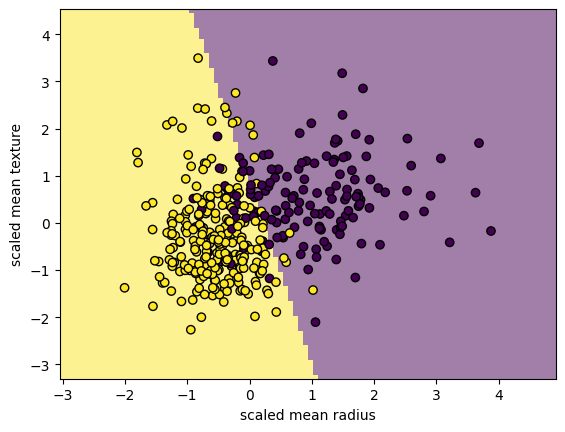

In [125]:
# display the decision boundary learned from the training dataset
# plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf['support vector machine'],
    clf['standard scaler'].transform(X_train),
    response_method = "predict",
    plot_method = "pcolormesh",
    xlabel = 'scaled mean radius',
    ylabel = 'scaled mean texture',
    shading = "auto",
    alpha = 0.5
)
# plot training data points
disp.ax_.scatter(
    clf['standard scaler'].transform(X_train)[:, 0],
    clf['standard scaler'].transform(X_train)[:, 1],
    c = y_train,
    edgecolors = 'k'
)
plt.show()

The kernel function is one of the most important parameter for a SVC. We can see how it influence the classifier by showing the decision boundaries.

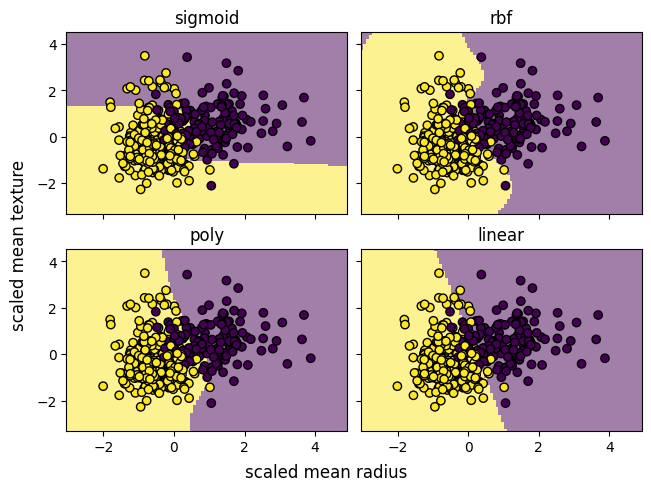

In [126]:
# plot decision boundaries with different kernel functions
fig, axs = plt.subplots(nrows = 2, ncols = 2, layout = 'constrained', sharex = True, sharey = True)
fig.supxlabel('scaled mean radius')
fig.supylabel('scaled mean texture')

for ax, kernel in zip(axs.flatten(), ('sigmoid', 'rbf', 'poly', 'linear')):
    # construct classifier with the specific kernel function
    clf = Pipeline(
        [
            ('standard scaler', StandardScaler()),
            ('support vector machine', SVC(
                kernel = kernel
            ))
        ]
    )
    # train the classifier
    clf.fit(X_train, y_train)
    # plot the decision boundary
    disp = DecisionBoundaryDisplay.from_estimator(
        clf['support vector machine'],
        clf['standard scaler'].transform(X_train),
        response_method = "predict",
        plot_method = "pcolormesh",
        shading = "auto",
        alpha = 0.5,
        ax = ax
    )
    # plot the training data points
    disp.ax_.scatter(
        clf['standard scaler'].transform(X_train)[:, 0],
        clf['standard scaler'].transform(X_train)[:, 1],
        c = y_train,
        edgecolors = 'k'
    )
    # set the title as the kernel function
    disp.ax_.set_title(kernel)

plt.show()

### Make predictions on testing dataset

Let us use the 'linear' kernel as the example for the following prediction and evaluation steps

In [127]:
# construct classifier with the specific kernel function
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'linear', # linear kernel function
            probability = True
        ))
    ]
)
# train the classifier
clf.fit(X_train, y_train)

# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 predictions
y_pred[:5]

array([1, 1, 1, 1, 1])

A SVM classifier cannot directly predict the probabilities. Although `SVC` provide the `predict_proba` method, the predictions are actually made through the [_Probability Calibration_](https://scikit-learn.org/stable/modules/calibration.html#calibration) process, which involves fitting a logistic regression model with cross validation. And the predicted probabilities may be inconsistent with the predicted classes.

In [128]:
# predict probabilities for testing dataset
y_pred_proba = clf.predict_proba(X_test)
# show the first 5 predictions
y_pred_proba[:5, :]

array([[0.25501237, 0.74498763],
       [0.41128036, 0.58871964],
       [0.18932553, 0.81067447],
       [0.31196137, 0.68803863],
       [0.14572685, 0.85427315]])

### Evaluate the model

Compute the confusion matrix.

Generate the classification report.

Create the ROC curve and calculate the AUC metric.

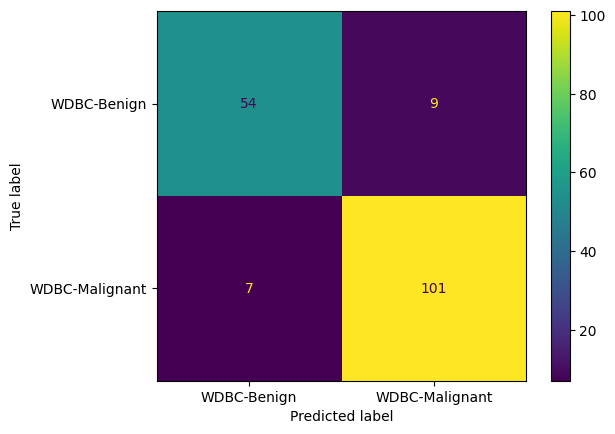

In [129]:
# compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['WDBC-Benign', 'WDBC-Malignant']
)
disp.plot()
plt.show()

In [130]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        63
           1       0.92      0.94      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



## Part 2. Hands-on exercise

In this exercise, we will build a multi-class classifier with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02 & 04.

The goal of the classifier is to perform a multi-class classification taks:
- 0 represents 'Low Price', 'MedHouseVal' < 1
- 1 represents 'Normal Price', 1 <= 'MedHouseVal' <= 2.5
- 2 represents 'Expensive Price', 'MedHouseVal' > 2.5

<span style="color:red">**[TBC]**</span> Please build the classifier with KNN and SVM respectively.

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [131]:
# [TBC] complete your code here with proper comments
data = datasets.fetch_california_housing()
data_df = pd.DataFrame(data.data,columns=data.feature_names)
data_df['MedHouseVal'] = data.target
data_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

### Task 2. Create the target labels

<span style="color:red">**[TBC]**</span> Use `MedHouseVal` as the reference to create a pandas series as the new target variable.

In [132]:
# [TBC] complete your code here with proper comments


# Define the conditions
conditions = [
    data_df['MedHouseVal'] < 1,
    (data_df['MedHouseVal'] >= 1) & (data_df['MedHouseVal'] <= 2.5),
    data_df['MedHouseVal'] > 2.5
]

# Define the corresponding class labels
choices = [0, 1, 2]

# Create the new target variable
data_df['PriceCategory'] = np.select(conditions, choices)

print(data_df['PriceCategory'].value_counts())


PriceCategory
1    11262
2     5782
0     3596
Name: count, dtype: int64


- 0 = 'Low Price'
- 1 = 'Normal Price'
- 2 = 'Expensive Price'

In [133]:
# Define features (X) and target (y)
target_df = data_df['PriceCategory']
feature_df = data_df.drop(['MedHouseVal', 'PriceCategory'], axis=1)

feature_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Task 3. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [134]:
# [TBC] complete your code here with proper comments
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 42
)

### Task 4. Train and evaluate the multi-class classifier using KNN
<span style="color:red">**[TBC]**</span> Using KNN to build a multi-class classifier, train the model and evaluate the performance using confusion matrix and `classification_report`.

In [135]:
# [TBC] complete your code here with proper comments
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('k-nearest neighbors', KNeighborsClassifier(
            n_neighbors = 5, # consider 5 nearest neighbors
            weights = 'uniform', # all nearest neighbors are equally important
            metric = 'minkowski', # use Euclidean distance as the distance metric
        ))
    ]
)

# fit the model
clf.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('k-nearest neighbors', KNeighborsClassifier())])

In [136]:
# [TBC] complete your code here with proper comments

# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 predictions
print(y_pred[:10])

# predict probabilities for testing dataset
y_pred_proba = clf.predict_proba(X_test)
# show the first 5 predictions
print(y_pred_proba[:5,:])

[0 0 2 2 2 1 2 1 1 2]
[[1.  0.  0. ]
 [0.8 0.2 0. ]
 [0.  0.  1. ]
 [0.  0.2 0.8]
 [0.  0.2 0.8]]


In [137]:
# obtain nearest neighbors
distances, indices = clf['k-nearest neighbors'].kneighbors(
    clf['standard scaler'].transform(X_test[:5, :])
)

# print the classes of the nearest neighbors
for index in indices:
    print('Classes of nearest neighbors:', y_train[index])

Classes of nearest neighbors: [0 0 0 0 0]
Classes of nearest neighbors: [0 0 0 0 1]
Classes of nearest neighbors: [2 2 2 2 2]
Classes of nearest neighbors: [2 2 1 2 2]
Classes of nearest neighbors: [2 2 2 2 1]


In [138]:
# get all metrics using `classification_report`
    # k = 5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1069
           1       0.75      0.83      0.79      3388
           2       0.76      0.65      0.70      1736

    accuracy                           0.75      6193
   macro avg       0.75      0.72      0.73      6193
weighted avg       0.75      0.75      0.75      6193



In [139]:
#k = 1

clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('k-nearest neighbors', KNeighborsClassifier(
            n_neighbors = 1, # consider 5 nearest neighbors
            weights = 'uniform', # all nearest neighbors are equally important
            metric = 'minkowski', # use Euclidean distance as the distance metric
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1069
           1       0.75      0.76      0.75      3388
           2       0.70      0.67      0.68      1736

    accuracy                           0.72      6193
   macro avg       0.71      0.70      0.71      6193
weighted avg       0.72      0.72      0.72      6193



In [140]:
#k = 100

clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('k-nearest neighbors', KNeighborsClassifier(
            n_neighbors = 100, # consider 5 nearest neighbors
            weights = 'uniform', # all nearest neighbors are equally important
            metric = 'minkowski', # use Euclidean distance as the distance metric
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66      1069
           1       0.71      0.91      0.79      3388
           2       0.82      0.54      0.65      1736

    accuracy                           0.74      6193
   macro avg       0.78      0.66      0.70      6193
weighted avg       0.76      0.74      0.73      6193



In [141]:
#k = 100

clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('k-nearest neighbors', KNeighborsClassifier(
            n_neighbors = 10000, # consider 5 nearest neighbors
            weights = 'uniform', # all nearest neighbors are equally important
            metric = 'minkowski', # use Euclidean distance as the distance metric
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1069
           1       0.55      1.00      0.71      3388
           2       0.00      0.00      0.00      1736

    accuracy                           0.55      6193
   macro avg       0.18      0.33      0.24      6193
weighted avg       0.30      0.55      0.39      6193



/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packa

### Task 5. Train and evaluate the multi-class classifier using SVM
<span style="color:red">**[TBC]**</span> Using SVM to build a multi-class classifier, train the model and evaluate the performance using confusion matrix and `classification_report`.

In [142]:
# construct the pipeline
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'linear', # linear kernel function
            probability = True
        ))
    ]
)

In [143]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('support vector machine',
                 SVC(kernel='linear', probability=True))])

In [144]:
# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 predictions
y_pred[:5]

array([0, 1, 2, 2, 2])

In [145]:
# predict probabilities for testing dataset
y_pred_proba = clf.predict_proba(X_test)
# show the first 5 predictions
y_pred_proba[:5, :]

array([[0.76190757, 0.23561666, 0.00247577],
       [0.11300408, 0.77805213, 0.1089438 ],
       [0.01623216, 0.24518751, 0.73858033],
       [0.00194064, 0.44767053, 0.55038883],
       [0.00820361, 0.40617881, 0.58561758]])

In [146]:
# linear
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1069
           1       0.74      0.84      0.79      3388
           2       0.79      0.67      0.73      1736

    accuracy                           0.75      6193
   macro avg       0.75      0.70      0.72      6193
weighted avg       0.75      0.75      0.75      6193



In [147]:
# construct the pipeline Polynominal
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'poly', # linear kernel function
            probability = True
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.39      0.52      1069
           1       0.69      0.91      0.78      3388
           2       0.83      0.58      0.68      1736

    accuracy                           0.73      6193
   macro avg       0.77      0.63      0.66      6193
weighted avg       0.75      0.73      0.71      6193



In [148]:
# construct the pipeline Sigmoid
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'sigmoid', # linear kernel function
            probability = True
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47      1069
           1       0.63      0.63      0.63      3388
           2       0.58      0.55      0.56      1736

    accuracy                           0.58      6193
   macro avg       0.55      0.56      0.55      6193
weighted avg       0.59      0.58      0.59      6193



In [149]:
# construct the pipeline RBF
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'rbf', # linear kernel function
            probability = True
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1069
           1       0.76      0.87      0.81      3388
           2       0.82      0.66      0.73      1736

    accuracy                           0.78      6193
   macro avg       0.79      0.73      0.76      6193
weighted avg       0.78      0.78      0.77      6193



### Challenge. Improve the performance of the above classifier

Try to improve the performance of the above classifiers by adding feature selection process and changing parameter values.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not encouraged. Try to complete the code even if it doesn't meet the requirements.

#### Feature Selection Manually

In [150]:
# [TBC] complete your code here with proper comments
# Split the data before doing the feature selection.
train_df = pd.DataFrame(X_train, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'])

train_df['PriceCategory']= y_train
train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PriceCategory
0,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09,1
1,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14,2
2,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00,1
3,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45,2
4,4.0791,11.0,5.878902,1.098493,4773.0,2.568891,33.17,-117.33,2
...,...,...,...,...,...,...,...,...,...
14442,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,1
14443,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0
14444,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,1
14445,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2


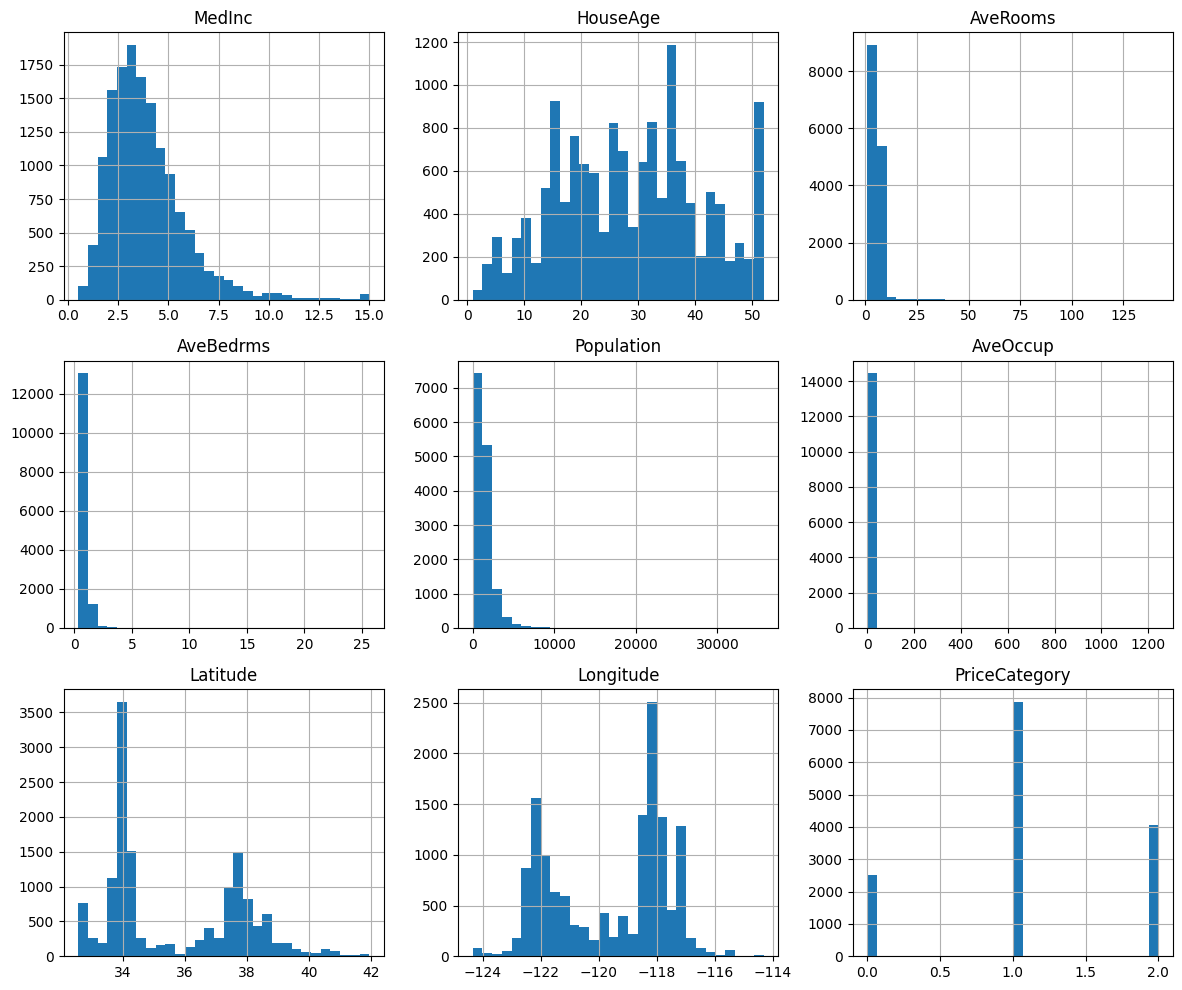

In [151]:
# Shows the histogram for all the numeric values in the data set.
train_df.hist(figsize=(12, 10),bins=30)

# Show the plot
plt.tight_layout() #Ensures the plots do not overlap and are neatly arranged.
plt.show()

In [152]:
corr = train_df.corr() # Shows the correlation between the different features
# Give visual support to the correlation table.
corr.style.background_gradient(cmap = 'coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PriceCategory
MedInc,1.000000,-0.117512,0.323253,-0.071108,0.003662,0.024554,-0.075886,-0.019026,0.588781
HouseAge,-0.117512,1.000000,-0.157537,-0.087342,-0.291585,0.017438,0.003489,-0.101113,0.055280
AveRooms,0.323253,-0.157537,1.000000,0.845550,-0.075527,-0.004659,0.111080,-0.028513,0.112604
AveBedrms,-0.071108,-0.087342,0.845550,1.000000,-0.071978,-0.005809,0.073125,0.017376,-0.060829
Population,0.003662,-0.291585,-0.075527,-0.071978,1.000000,0.075018,-0.101678,0.092175,0.028530
AveOccup,0.024554,0.017438,-0.004659,-0.005809,0.075018,1.000000,0.007654,-0.002294,-0.016588
Latitude,-0.075886,0.003489,0.111080,0.073125,-0.101678,0.007654,1.000000,-0.923405,-0.165101
Longitude,-0.019026,-0.101113,-0.028513,0.017376,0.092175,-0.002294,-0.923405,1.000000,-0.034355
PriceCategory,0.588781,0.055280,0.112604,-0.060829,0.028530,-0.016588,-0.165101,-0.034355,1.000000


Doing the correlation of the training data to understand the feature selection.
Selecting the k=5 I would choose:
1. MedInc 0.58
2. AveRooms 0.11
3. AveBedrms -0.060
4. HouseAge 0.055
5. Longitude -0.034

#### Feature Selection SkLearn

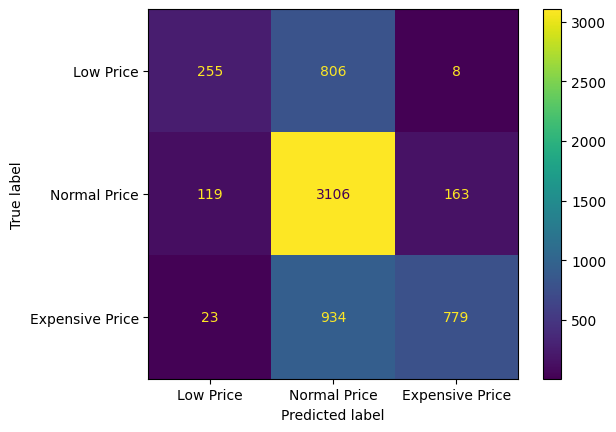

              precision    recall  f1-score   support

           0       0.64      0.24      0.35      1069
           1       0.64      0.92      0.75      3388
           2       0.82      0.45      0.58      1736

    accuracy                           0.67      6193
   macro avg       0.70      0.53      0.56      6193
weighted avg       0.69      0.67      0.64      6193



In [153]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# construct the pipeline Polynominal
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=2)),
        ('support vector machine', SVC(
            kernel = 'poly', # linear kernel function
            probability = True
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Low Price', 'Normal Price','Expensive Price']
)
disp.plot()

plt.show()
print(classification_report(y_test, y_pred))

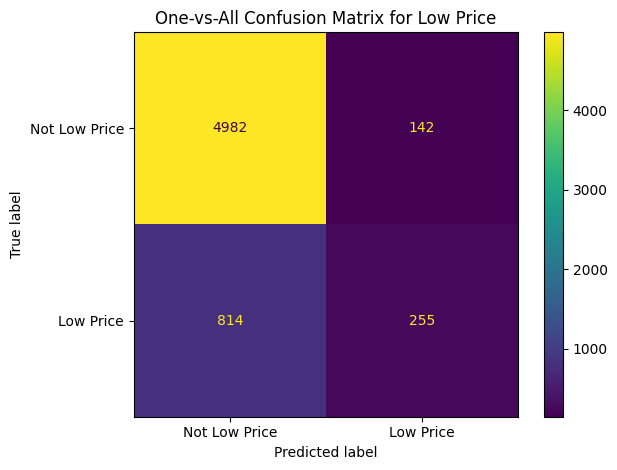

Classification Report for Low Price:
               precision    recall  f1-score   support

Not Low Price       0.86      0.97      0.91      5124
    Low Price       0.64      0.24      0.35      1069

     accuracy                           0.85      6193
    macro avg       0.75      0.61      0.63      6193
 weighted avg       0.82      0.85      0.82      6193



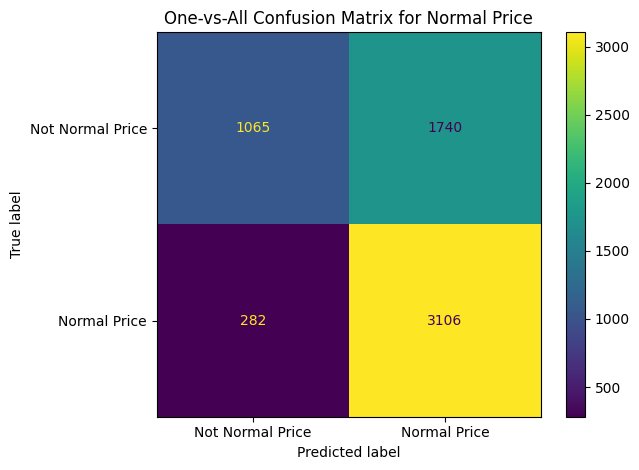

Classification Report for Normal Price:
                  precision    recall  f1-score   support

Not Normal Price       0.79      0.38      0.51      2805
    Normal Price       0.64      0.92      0.75      3388

        accuracy                           0.67      6193
       macro avg       0.72      0.65      0.63      6193
    weighted avg       0.71      0.67      0.65      6193



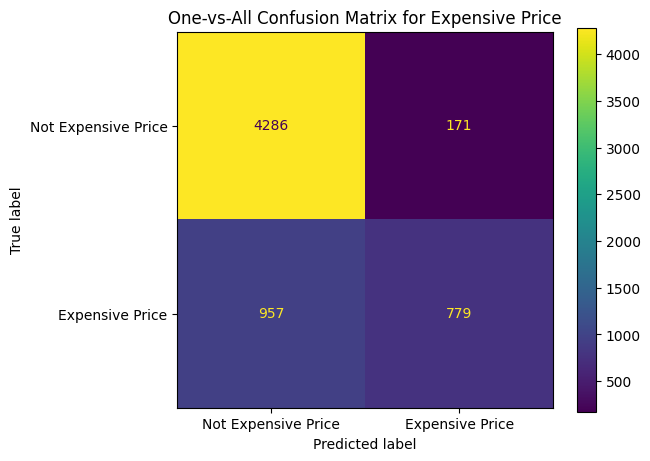

Classification Report for Expensive Price:
                     precision    recall  f1-score   support

Not Expensive Price       0.82      0.96      0.88      4457
    Expensive Price       0.82      0.45      0.58      1736

           accuracy                           0.82      6193
          macro avg       0.82      0.71      0.73      6193
       weighted avg       0.82      0.82      0.80      6193



In [154]:
classes = ['Low Price', 'Normal Price', 'Expensive Price']

# Iterate over each class to compute a one-vs-all confusion matrix
for i, class_name in enumerate(classes):
    # Create binary labels for the current class
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {class_name}', class_name])
    disp.plot()
    plt.title(f'One-vs-All Confusion Matrix for {class_name}')
    plt.tight_layout()
    plt.show()

    # Compute precision, recall, and F1-score
    print(f"Classification Report for {class_name}:")
    print(classification_report(y_test_binary, y_pred_binary, target_names=[f'Not {class_name}', class_name]))

I display the different multi-class confusion matrixes to understand the behavior of each one of the labels. Identifiyng that the less precise is the 'Normal Price', the one how could have more fake negative or positive values.

### Changing kernel parameters

#### Sigmoid

In [155]:
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=5)),
        ('support vector machine', SVC(
            kernel = 'sigmoid', # linear kernel function
            probability = True
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1069
           1       0.61      0.61      0.61      3388
           2       0.51      0.50      0.50      1736

    accuracy                           0.56      6193
   macro avg       0.54      0.54      0.54      6193
weighted avg       0.56      0.56      0.56      6193



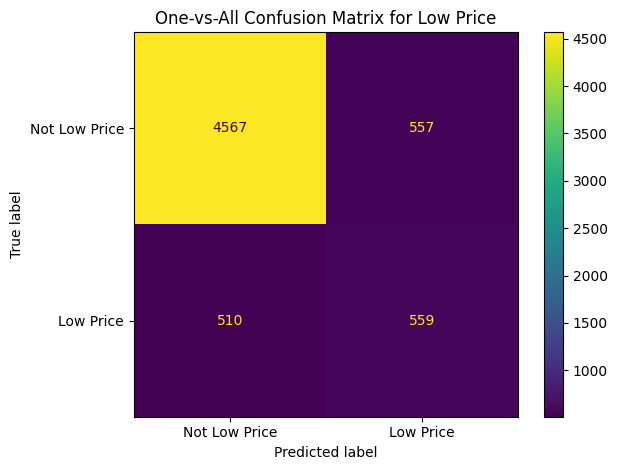

Classification Report for Low Price:
               precision    recall  f1-score   support

Not Low Price       0.90      0.89      0.90      5124
    Low Price       0.50      0.52      0.51      1069

     accuracy                           0.83      6193
    macro avg       0.70      0.71      0.70      6193
 weighted avg       0.83      0.83      0.83      6193



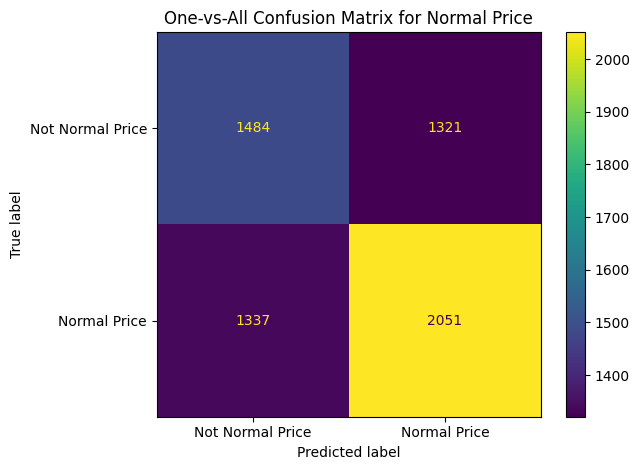

Classification Report for Normal Price:
                  precision    recall  f1-score   support

Not Normal Price       0.53      0.53      0.53      2805
    Normal Price       0.61      0.61      0.61      3388

        accuracy                           0.57      6193
       macro avg       0.57      0.57      0.57      6193
    weighted avg       0.57      0.57      0.57      6193



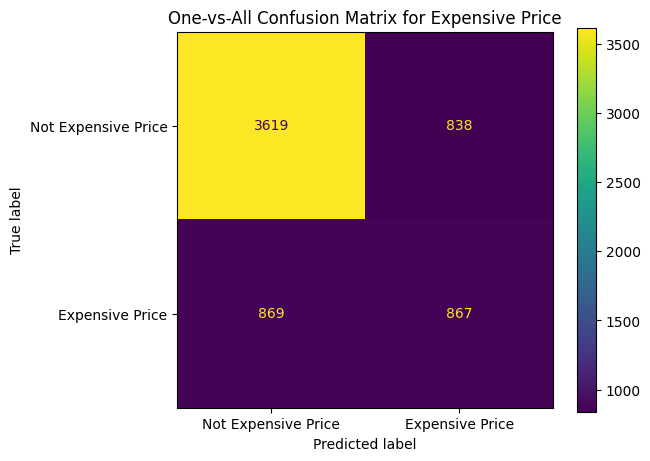

Classification Report for Expensive Price:
                     precision    recall  f1-score   support

Not Expensive Price       0.81      0.81      0.81      4457
    Expensive Price       0.51      0.50      0.50      1736

           accuracy                           0.72      6193
          macro avg       0.66      0.66      0.66      6193
       weighted avg       0.72      0.72      0.72      6193



In [156]:
classes = ['Low Price', 'Normal Price', 'Expensive Price']

# Iterate over each class to compute a one-vs-all confusion matrix
for i, class_name in enumerate(classes):
    # Create binary labels for the current class
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {class_name}', class_name])
    disp.plot()
    plt.title(f'One-vs-All Confusion Matrix for {class_name}')
    plt.tight_layout()
    plt.show()

    # Compute precision, recall, and F1-score
    print(f"Classification Report for {class_name}:")
    print(classification_report(y_test_binary, y_pred_binary, target_names=[f'Not {class_name}', class_name]))

#### RBF

In [157]:
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=6)),
        ('support vector machine', SVC(
            kernel = 'rbf', # linear kernel function
            probability = True
        ))
    ]
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1069
           1       0.76      0.88      0.82      3388
           2       0.82      0.66      0.73      1736

    accuracy                           0.78      6193
   macro avg       0.80      0.74      0.76      6193
weighted avg       0.79      0.78      0.78      6193



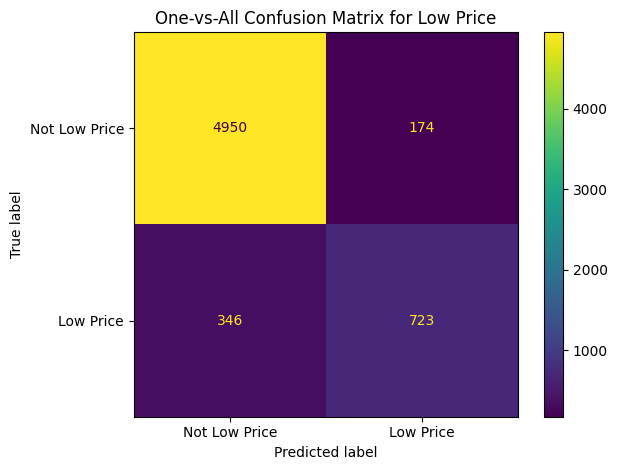

Classification Report for Low Price:
               precision    recall  f1-score   support

Not Low Price       0.93      0.97      0.95      5124
    Low Price       0.81      0.68      0.74      1069

     accuracy                           0.92      6193
    macro avg       0.87      0.82      0.84      6193
 weighted avg       0.91      0.92      0.91      6193



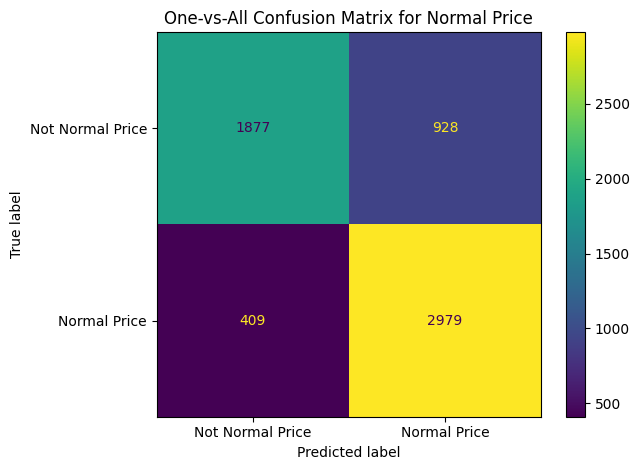

Classification Report for Normal Price:
                  precision    recall  f1-score   support

Not Normal Price       0.82      0.67      0.74      2805
    Normal Price       0.76      0.88      0.82      3388

        accuracy                           0.78      6193
       macro avg       0.79      0.77      0.78      6193
    weighted avg       0.79      0.78      0.78      6193



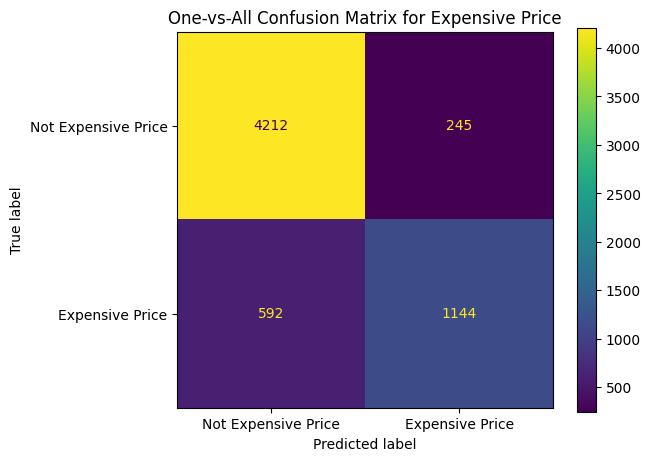

Classification Report for Expensive Price:
                     precision    recall  f1-score   support

Not Expensive Price       0.88      0.95      0.91      4457
    Expensive Price       0.82      0.66      0.73      1736

           accuracy                           0.86      6193
          macro avg       0.85      0.80      0.82      6193
       weighted avg       0.86      0.86      0.86      6193



In [158]:
classes = ['Low Price', 'Normal Price', 'Expensive Price']

# Iterate over each class to compute a one-vs-all confusion matrix
for i, class_name in enumerate(classes):
    # Create binary labels for the current class
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {class_name}', class_name])
    disp.plot()
    plt.title(f'One-vs-All Confusion Matrix for {class_name}')
    plt.tight_layout()
    plt.show()

    # Compute precision, recall, and F1-score
    print(f"Classification Report for {class_name}:")
    print(classification_report(y_test_binary, y_pred_binary, target_names=[f'Not {class_name}', class_name]))

The best improvement I could find was with the RBF kernel parameter and the feature selection of k = 6.
But the change was not significant enough to be considered as an improvement. 